In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

/opt/homebrew/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

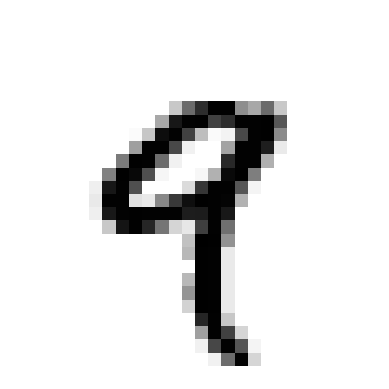

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
X, y = mnist["data"], mnist["target"]
some_digit = X[4] 
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()


Training a Binary Classifier

In [5]:
import numpy as np
y = y.astype(np.uint8)

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
# y_test_5 = (y_test == 5)

In [7]:
from sklearn.linear_model import SGDClassifier 
sgd_clf = SGDClassifier(random_state=42)
# sgd_clf.fit(X_train, y_train_5)



In [8]:
# sgd_clf.predict([some_digit])

Performance Measures

In [9]:
# from sklearn.model_selection import cross_val_score
# cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [10]:
# from sklearn.base import BaseEstimator
# class Never5Classifier(BaseEstimator): 
#     def fit(self, X, y=None):
#         pass
#     def predict(self, X):
#         return np.zeros((len(X), 1), dtype=bool)
    
# never_5_clf = Never5Classifier()
# cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [11]:
# from sklearn.model_selection import cross_val_predict
# y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


In [12]:

# from sklearn.metrics import confusion_matrix 
# confusion_matrix(y_train_5, y_train_pred)

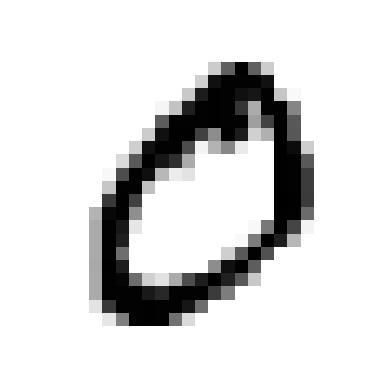

In [13]:
text_value = X[1]
some_digit_image = text_value.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [14]:
# sgd_clf.predict([X[35]])

In [24]:
import pygame
import numpy as np
from PIL import Image

#store image array
image = []

# Define the colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)

# Set the width and height of each pixel
PIXEL_WIDTH = 20
PIXEL_HEIGHT = 20

# Set the size of the canvas
CANVAS_WIDTH = 560
CANVAS_HEIGHT = 560


def main():
    # Initialize pygame
    pygame.init()
     
    # Set the size of the screen
    size = (CANVAS_WIDTH, CANVAS_HEIGHT)
    screen = pygame.display.set_mode(size)
     
    # Set the title of the window
    pygame.display.set_caption("Pixelated Canvas")

  


    # Set up the black variable
    black = True
     
    # Create a 2D array to represent the canvas
    canvas = []
    for row in range(CANVAS_HEIGHT // PIXEL_HEIGHT):
        canvas.append([WHITE] * (CANVAS_WIDTH // PIXEL_WIDTH))
     
  # Set up the button
    # button_font = pygame.font.Font(None, 36)
    # button_text = button_font.render("Toggle Black", True, (255, 255, 255))
    # button_rect = button_text.get_rect()
    # button_rect.centerx = canvas.get_rect().centerx
    # button_rect.top = 10
    # Loop until the user clicks the close button
    done = False
     
    # Used to manage how fast the screen updates
    clock = pygame.time.Clock()
     
    # Set the default color to black
    current_color = BLACK
     
    # Main program loop
    while not done:
        # Handle events
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                done = True
            elif event.type == pygame.MOUSEBUTTONDOWN:
                # Get the position of the mouse
                pos = pygame.mouse.get_pos()
                
                # Convert the position to pixel coordinates
                pixel_x = pos[0] // PIXEL_WIDTH
                pixel_y = pos[1] // PIXEL_HEIGHT
                
                # Change the color of the pixel
                canvas[pixel_y][pixel_x] = current_color
                
                # Set the drawing flag to True
                drawing = True
            elif event.type == pygame.MOUSEBUTTONUP:
                # Set the drawing flag to False
                drawing = False

            # elif event.type == pygame.MOUSEBUTTONDOWN and event.button == 1:
            # # If the left mouse button is clicked, toggle black
            #     current_color = WHITE
        
        # Draw pixels while the user holds down the mouse button
        if pygame.mouse.get_pressed()[0] and drawing:
            # Get the position of the mouse
            pos = pygame.mouse.get_pos()
            
            # Convert the position to pixel coordinates
            pixel_x = pos[0] // PIXEL_WIDTH
            pixel_y = pos[1] // PIXEL_HEIGHT
            
            # Change the color of the pixel
            canvas[pixel_y][pixel_x] = current_color
        
        # Clear the screen
        screen.fill(WHITE)
        
        # Draw the canvas
        for y, row in enumerate(canvas):
            for x, color in enumerate(row):
                pygame.draw.rect(screen, color, [x * PIXEL_WIDTH, y * PIXEL_HEIGHT, PIXEL_WIDTH, PIXEL_HEIGHT])
        
        # Update the screen
        pygame.display.flip()
        
        # Limit to 60 frames per second
        #clock.tick(60)
     
    # # Save the final image
    #image = Image.fromarray(np.array(canvas))

    for i in range(len(canvas)):
        for j in range(len(canvas[i])):
            image.append(255 - canvas[i][j][0])
        
  
    pygame.quit()
 
if __name__ == "__main__":
    main()

In [16]:
# Multiclass Classification
sgd_clf.fit(X_train, y_train) 


SGDClassifier(random_state=42)

In [25]:
sgd_clf.predict([image])

array([3], dtype=uint8)

In [21]:
sgd_clf.predict([some_digit])

array([9], dtype=uint8)

In [26]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-45606.88156161, -20077.79903687, -23620.86693862,
        -11077.35532351,  -8578.08720996,  -7133.8897717 ,
        -27033.93740198,  -8312.88994614,  -3257.29010483,
          2193.22821614]])

: 

In [20]:
print(np.argmax(some_digit_scores))
print(sgd_clf.classes_)
print(sgd_clf.classes_[5])


9
[0 1 2 3 4 5 6 7 8 9]
5
